## Medical Insurance Premium Prediction

Dataset Source: https://www.kaggle.com/datasets/tejashvi14/medical-insurance-premium-prediction

#### Import Necessary Libraries

In [1]:
import sys
from statistics import mean

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import FunctionTransformer, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import SGDRegressor, ElasticNet
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.ensemble import StackingRegressor, VotingRegressor, BaggingRegressor

import xgboost as xgb
from xgboost import XGBRegressor

#### Show Library Versions

In [2]:
n = 18

print(f"Language/Library".rjust(n-2), '|', 'Version')
print('-' * (n-2), '|', '--------')
print("Python :".rjust(n), sys.version[0:6])
print("NumPy :".rjust(n), np.__version__)
print("Pandas :".rjust(n), pd.__version__)
print("Sklearn :".rjust(n), sklearn.__version__)
print('XGBoost :'.rjust(n), xgb.__version__)
print("Seaborn :".rjust(n), sns.__version__)

Language/Library | Version
---------------- | --------
          Python : 3.9.12
           NumPy : 1.24.3
          Pandas : 2.0.1
         Sklearn : 1.2.2
         XGBoost : 1.7.5
         Seaborn : 0.12.2


### Initial Data Preprocessing

#### Ingest Dataset

In [3]:
col_names = ["age",
             "diabetes",
             "blood_pressure_problems",
             "any_transplants",
             "any_chronic_diseases",
             "height",
             "weight",
             "known_allergies",
             "history_of_cancer_in_family",
             "number_of_major_surgeries",
             "premium_price"
             ]

dtypes = {"age": np.int8,
          "diabetes": np.int8,
          "blood_pressure_problems": np.int8,
          "any_transplants": np.int8,
          "any_chronic_diseases": np.int8,
          "height": np.int16,
          "weight": np.int16,
          "known_allergies": np.int8,
          "history_of_cancer_in_family": np.int8,
          "number_of_major_surgeries": np.int8,
          "premium_price": np.int32
            }

data = pd.read_csv("Medicalpremium.csv",
                   names=col_names, 
                   dtype=dtypes,
                   engine='c',
                   header=0)

data.head()

,age,diabetes,blood_pressure_problems,any_transplants,any_chronic_diseases,height,weight,known_allergies,history_of_cancer_in_family,number_of_major_surgeries,premium_price
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


#### More Dataset Information

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   age                          986 non-null    int8 
 1   diabetes                     986 non-null    int8 
 2   blood_pressure_problems      986 non-null    int8 
 3   any_transplants              986 non-null    int8 
 4   any_chronic_diseases         986 non-null    int8 
 5   height                       986 non-null    int16
 6   weight                       986 non-null    int16
 7   known_allergies              986 non-null    int8 
 8   history_of_cancer_in_family  986 non-null    int8 
 9   number_of_major_surgeries    986 non-null    int8 
 10  premium_price                986 non-null    int32
dtypes: int16(2), int32(1), int8(8)
memory usage: 15.5 KB


### Visualizations

#### Create Function to Visualize Features (Histograms)

In [5]:
def histogram_visual(feature_to_visualize: pd.Series,
                     num_of_bins: int,
                     plot_title: str,
                     x_label: str,
                     x_start: float = -1.0,
                     y_label: str = "# of Samples",
                     ):
    """
    This function returns a histogram for a feature.
    
    Inputs: 
    - feature_to_visualize: Feature to plot in the form 
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - x_start: To force the x-axis of the visual to start at 
    a specified value instead of the automatically generated 
    value, assign the float value here. Otherwise, the 
    autogenerated start value will be used.
    - y_label: The string label value for the y label.
    
    Output:
    - A histogram.
    """
    
    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
    assert type(x_start) != 'float', \
        "The x_start value must be a float value."
    
    ax = feature_to_visualize.hist(grid=False, 
                                   bins=num_of_bins, 
                                   figsize=(18, 8))
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    if x_start != -1:
        plt.xlim([0, (max(feature_to_visualize) + (1/num_of_bins))])

    plt.show()

#### Dataset Visualization: Customer's Ages

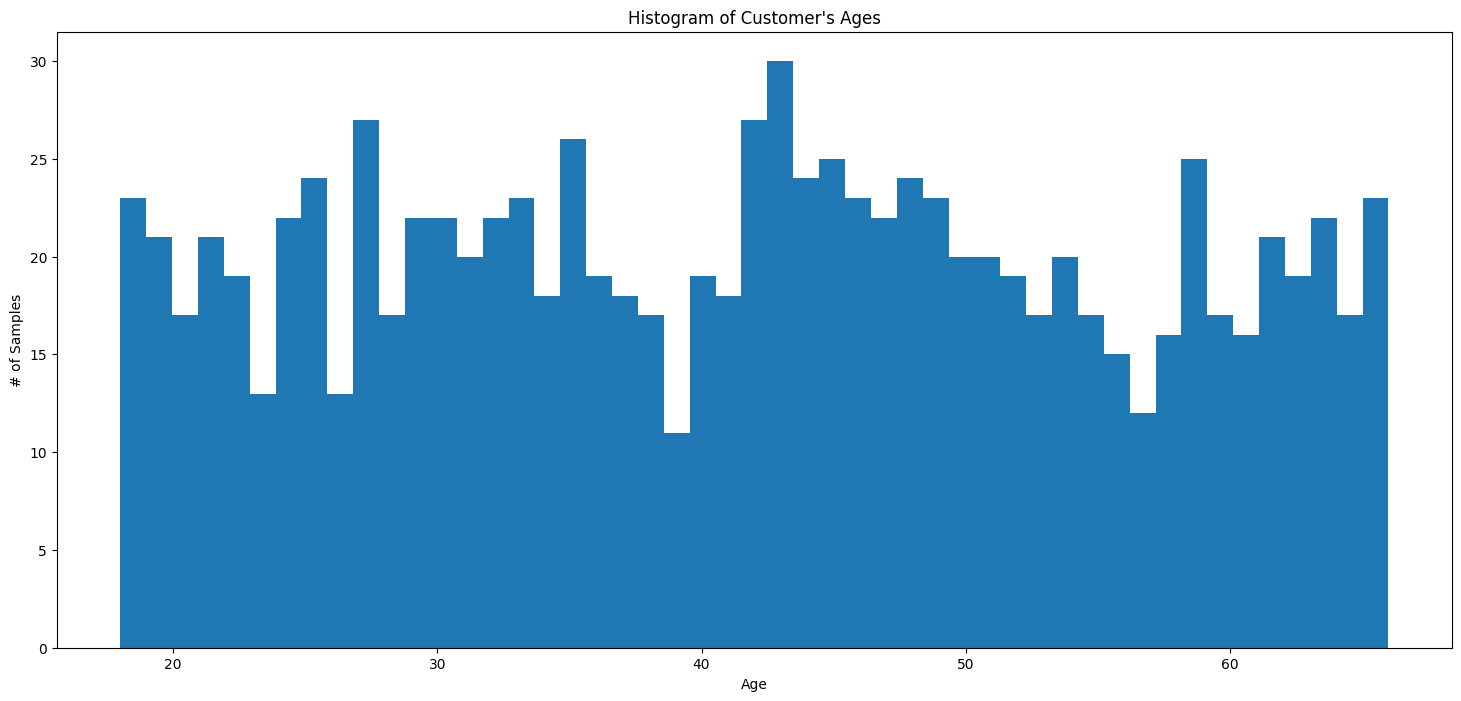

The age range is 18 to 66 years old.


In [6]:
histogram_visual(data['age'],
                 num_of_bins=49,
                 plot_title="Histogram of Customer's Ages",
                 x_label="Age")

print(f"The age range is {min(data['age'])} to" + 
      f" {max(data['age'])} years old.")

#### Dataset Visualization: Customer's Heights

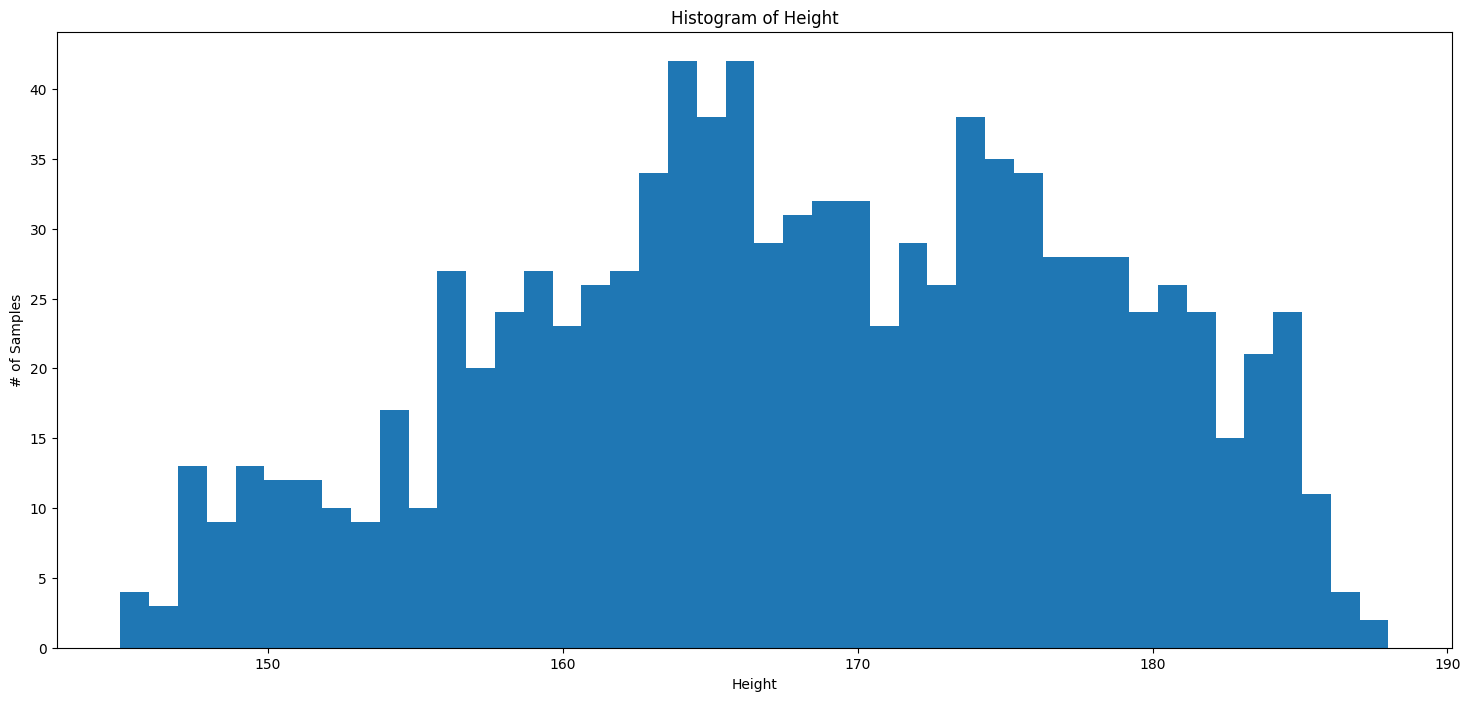

The height range is 145 to 188.


In [7]:
histogram_visual(data['height'],
                 num_of_bins=44,
                 plot_title="Histogram of Height",
                 x_label="Height")

print(f"The height range is {min(data['height'])} to" + 
      f" {max(data['height'])}.")

#### Dataset Visualization: Customer's Weights

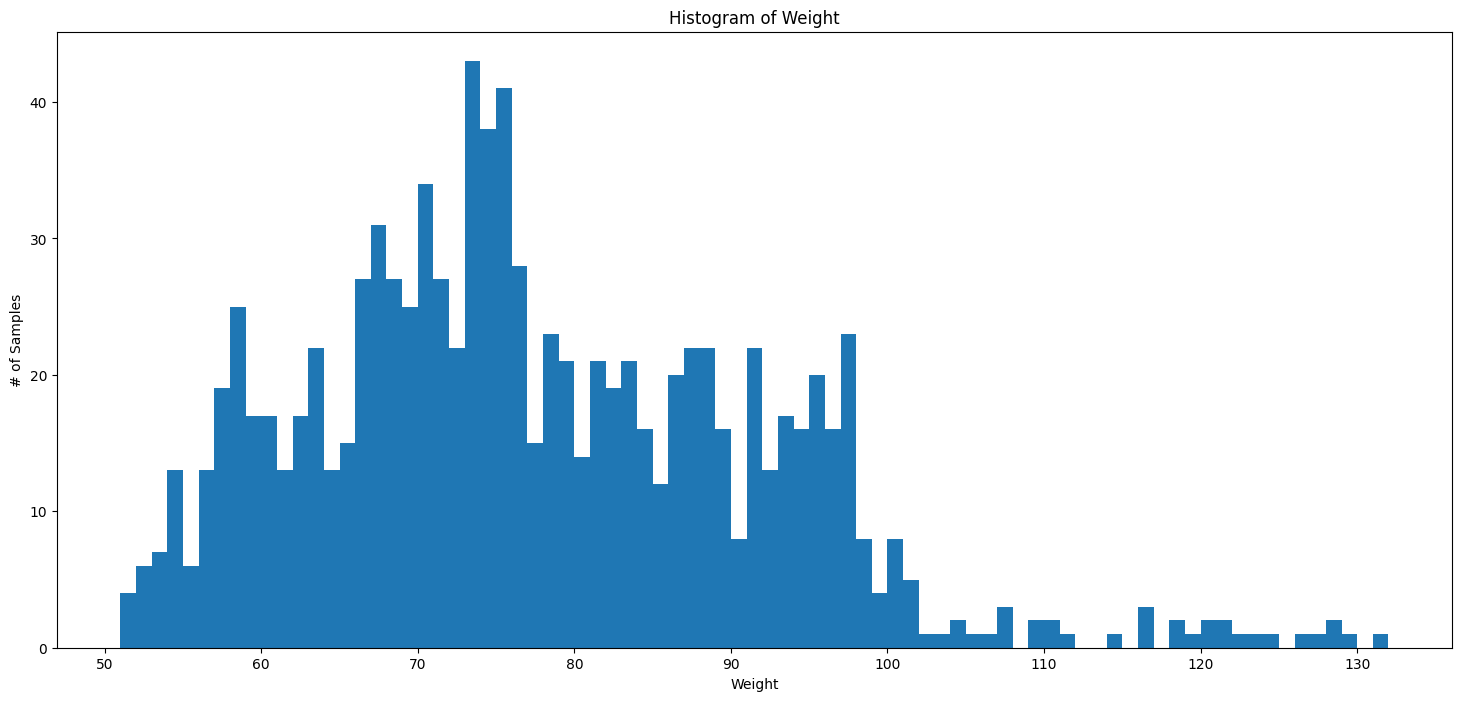

The weight range is 51 to 132.


In [8]:
histogram_visual(data['weight'],
                 num_of_bins=81,
                 plot_title="Histogram of Weight",
                 x_label="Weight")

print(f"The weight range is {min(data['weight'])} to" + 
      f" {max(data['weight'])}.")

#### Dataset Visualization: Premium Prices

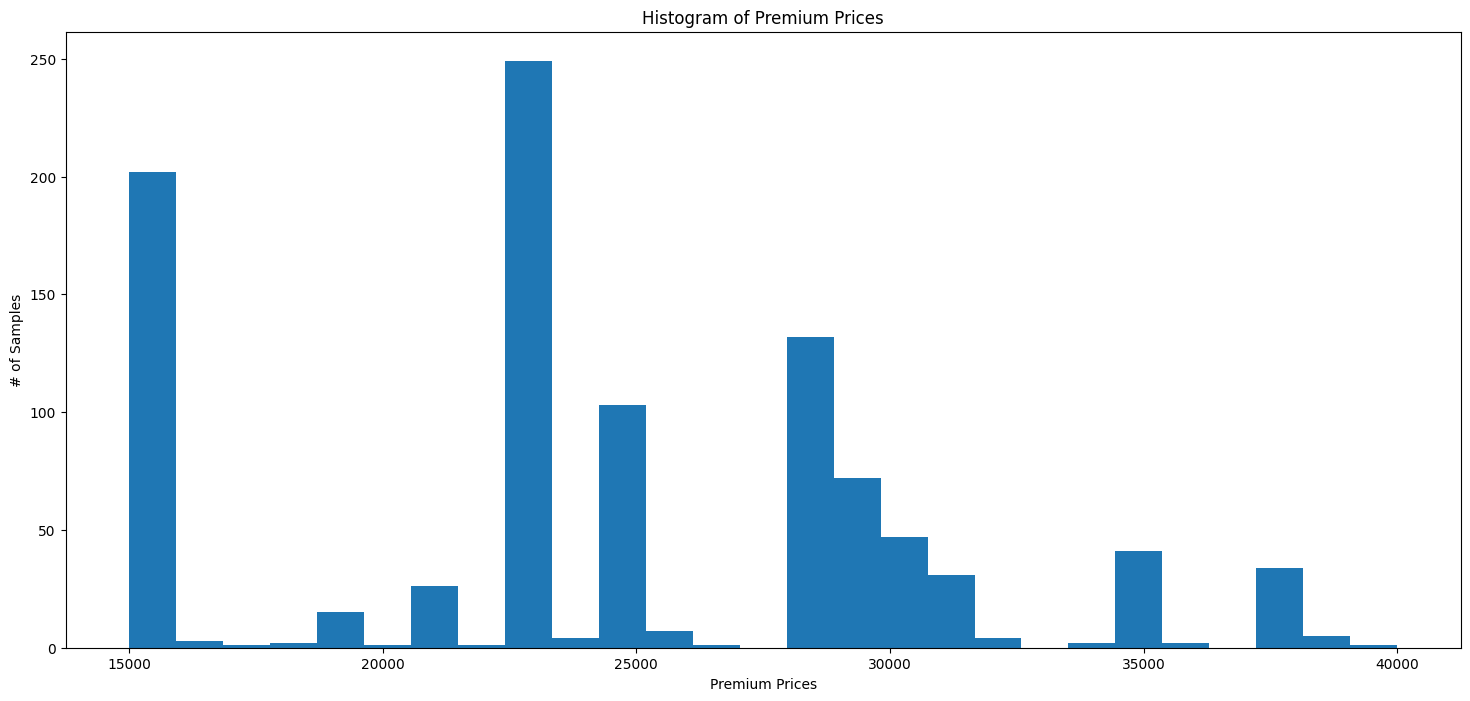

The premium prices ranged from 15000 to 40000.


In [9]:
histogram_visual(data['premium_price'],
                 num_of_bins=27,
                 plot_title="Histogram of Premium Prices",
                 x_label="Premium Prices")

print(f"The premium prices ranged" +
      f" from {min(data['premium_price'])}" + 
      f" to {max(data['premium_price'])}.")

#### Create Function to Visualize Features (Barplot)

In [10]:
def barplot_visual(feature_to_visualize: pd.Series,
                   plot_title: str,
                   x_label: str,
                   y_label: str = "# of Samples",
                   ):
    """
    This function returns a histogram for a feature.
    
    Inputs: 
    - feature_to_visualize: Feature to plot in the form 
    of pandas Series.
    - plot_title: The title of the plot/visual.
    - x_label: The string label value for the x label.
    - y_label: The string label value for the y label.
    
    Output:
    - A Bar Plot.
    """
    
    assert type(feature_to_visualize) == pd.Series, \
        "Make sure the dataset input type is a Pandas Series."
    assert type(plot_title) != 'str', \
        "The title value must be a string value."
    assert type(x_label) !=  'str', \
        "The x label value must be a string value."
    assert type(y_label) != 'str', \
        "The y label value must be a string value."
        
    ax = feature_to_visualize.value_counts().plot.bar( 
                                                      figsize=(12,8),
                                                      rot=0, 
                                                      legend=False,
                                                      color=["lightgreen", 
                                                             "blue", 
                                                             "brown", 
                                                             "lightblue",
                                                             "tan", 
                                                             "yellow", 
                                                             "orange",
                                                             "green", 
                                                             "red",
                                                             "purple"]
                                                      )
    
    ax.bar_label(ax.containers[0])
    
    plt.suptitle('')
    plt.title(plot_title)
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    plt.show()

#### Dataset Visualization: Diabetes

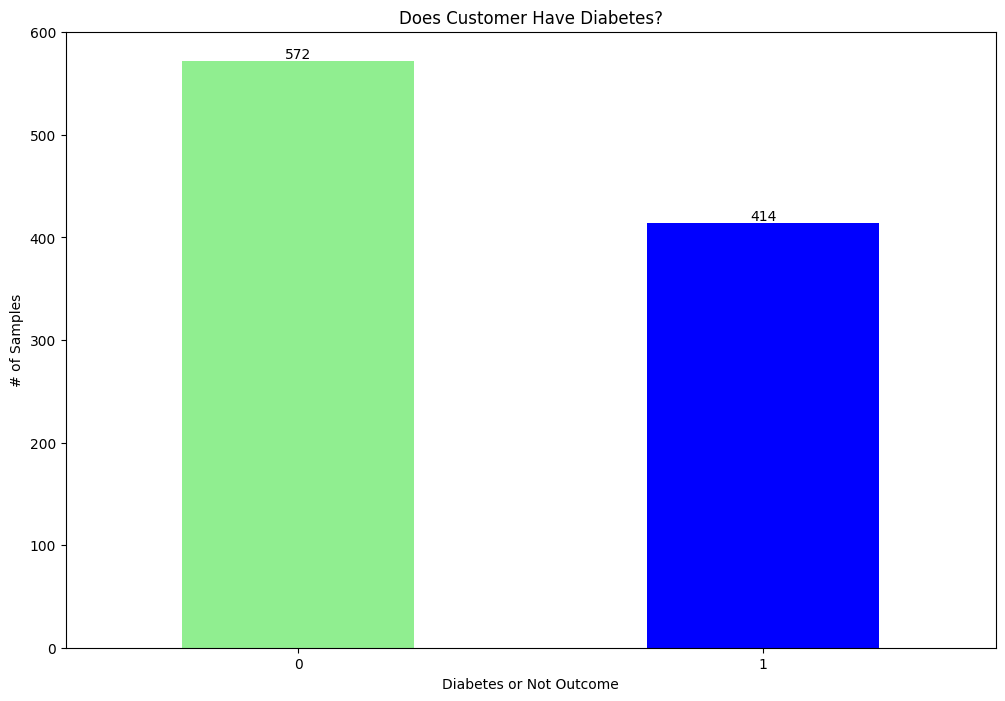

In [11]:
barplot_visual(data["diabetes"],
               "Does Customer Have Diabetes?",
               "Diabetes or Not Outcome",
               "# of Samples",
               )

#### Dataset Visualization: Blood Pressure Problems

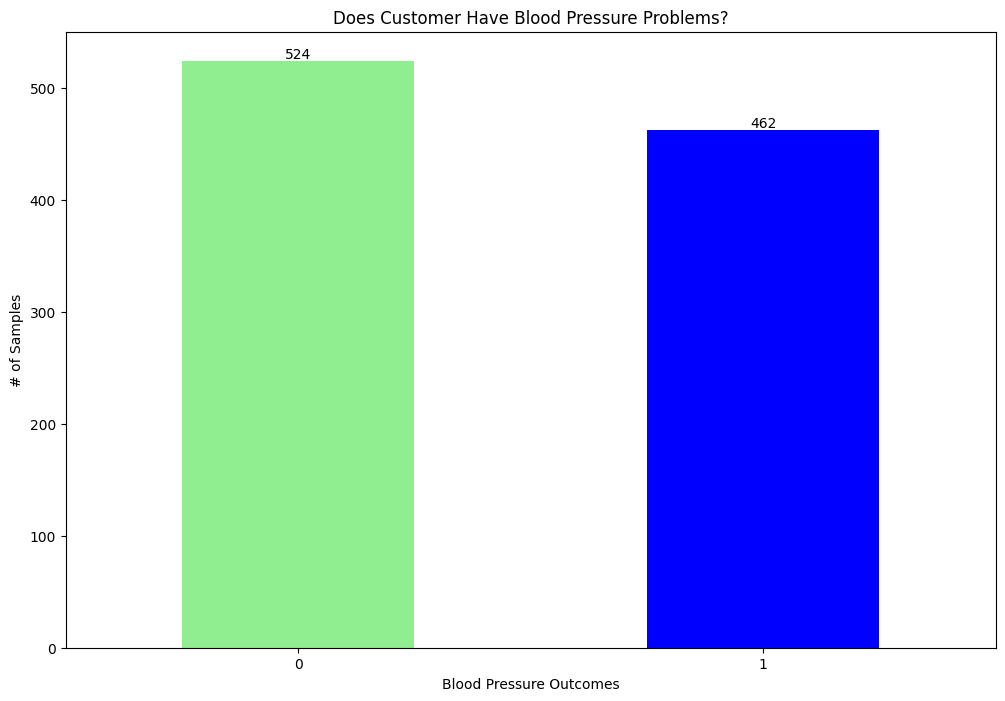

In [12]:
barplot_visual(data["blood_pressure_problems"],
               "Does Customer Have Blood Pressure Problems?",
               "Blood Pressure Outcomes",
               "# of Samples",
               )

#### Dataset Visualization: Any Transplants

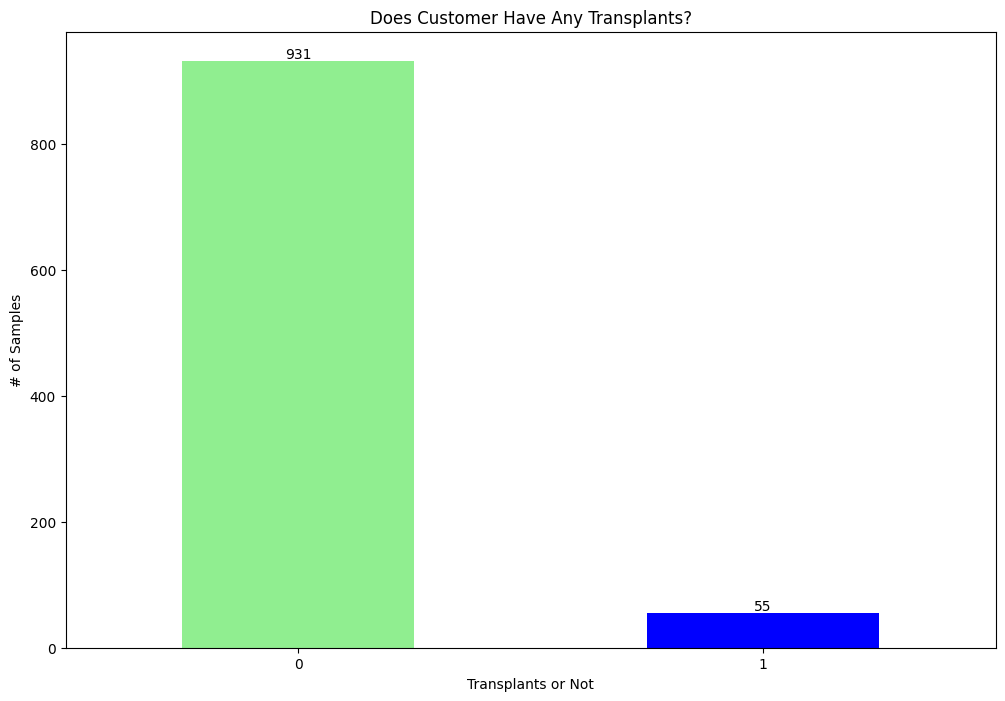

In [13]:
barplot_visual(data["any_transplants"],
               "Does Customer Have Any Transplants?",
               "Transplants or Not",
               "# of Samples",
               )

#### Dataset Visualization: Any Chronic Diseases

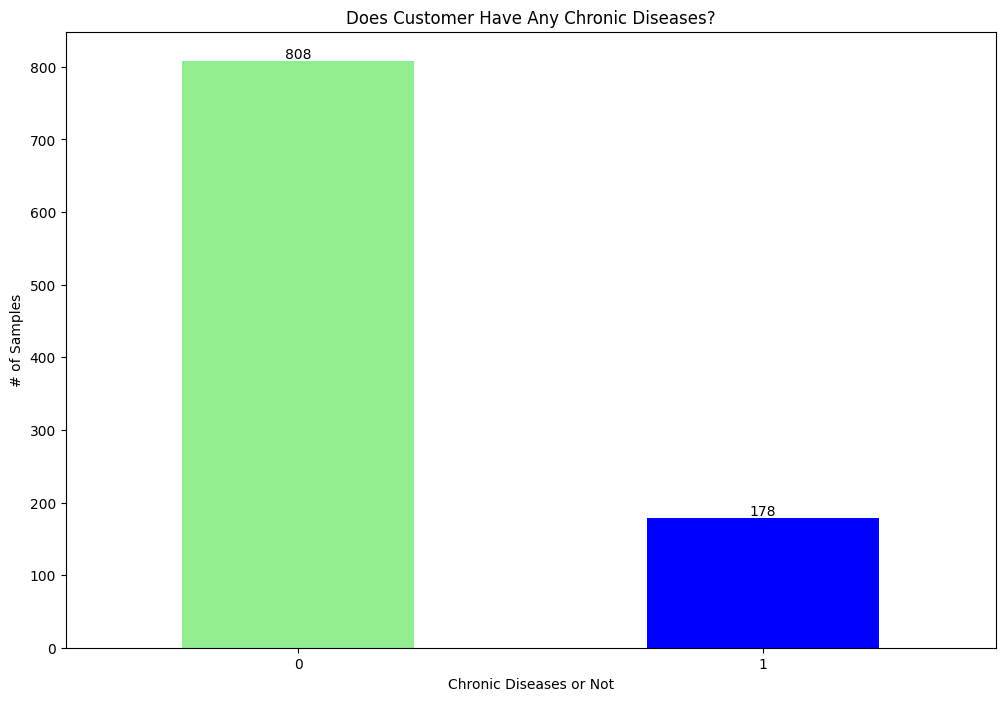

In [14]:
barplot_visual(data["any_chronic_diseases"],
               "Does Customer Have Any Chronic Diseases?",
               "Chronic Diseases or Not",
               "# of Samples",
               )

#### Dataset Visualization: Known Allergies

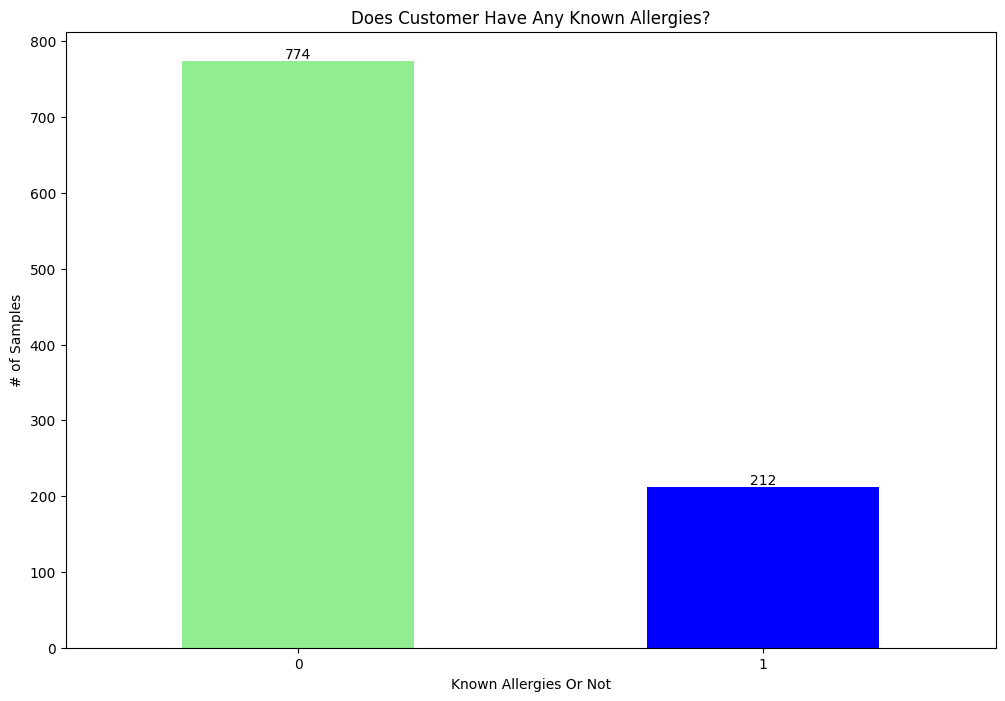

In [15]:
barplot_visual(data["known_allergies"],
               "Does Customer Have Any Known Allergies?",
               "Known Allergies Or Not",
               "# of Samples",
               )

#### Dataset Visualization: History of Cancer in Family

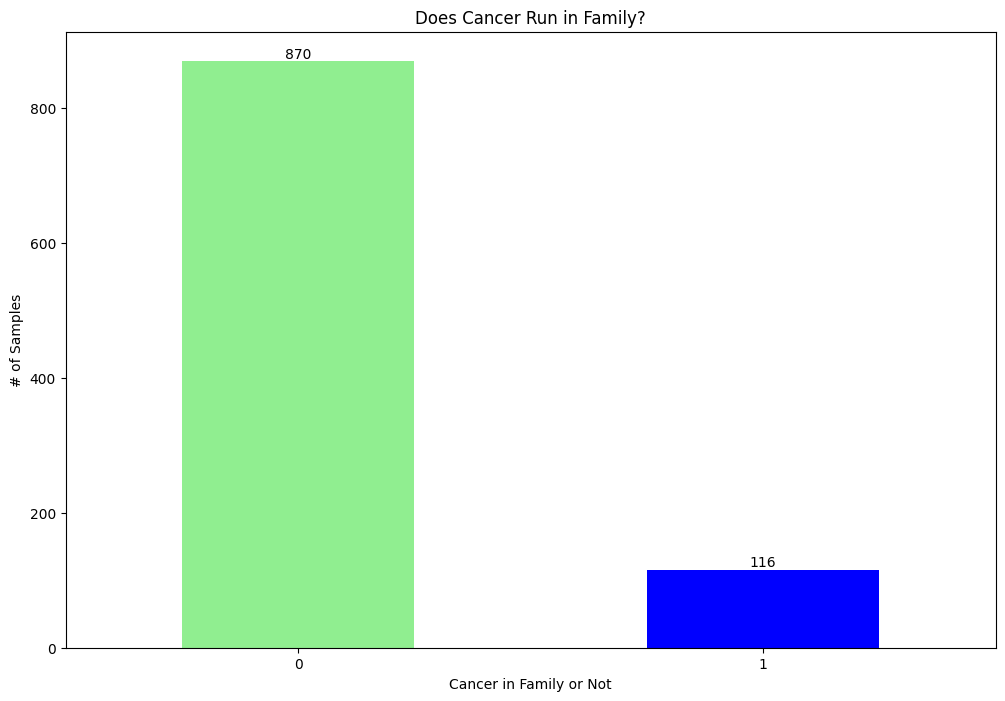

In [16]:
barplot_visual(data["history_of_cancer_in_family"],
               "Does Cancer Run in Family?",
               "Cancer in Family or Not",
               "# of Samples",
               )

#### Dataset Visualization: Number of Major Surgeries

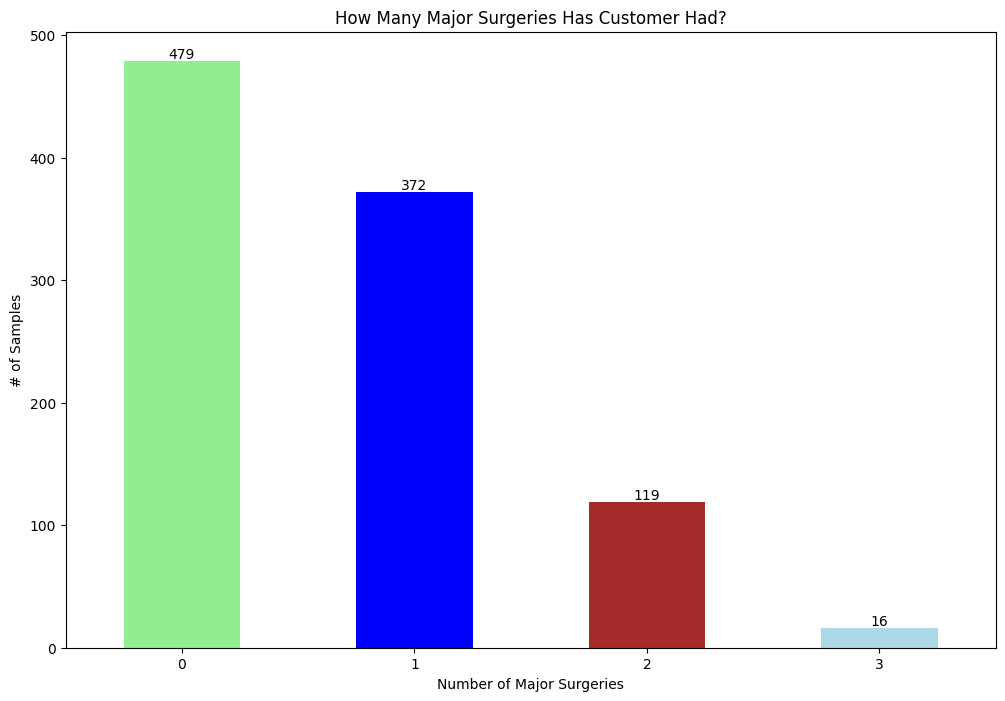

In [17]:
barplot_visual(data["number_of_major_surgeries"],
               "How Many Major Surgeries Has Customer Had?",
               "Number of Major Surgeries",
               "# of Samples",
               )

### Exploratory Data Analysis & Preprocessing

#### Descriptive Statistics

In [18]:
data.describe(percentiles=[0.01, 0.10, 0.25, 0.50, 0.75, 0.90, 0.99], include='all')

,age,diabetes,blood_pressure_problems,any_transplants,any_chronic_diseases,height,weight,known_allergies,history_of_cancer_in_family,number_of_major_surgeries,premium_price
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
1%,18.000000,0.000000,0.000000,0.000000,0.000000,147.000000,52.850000,0.000000,0.000000,0.000000,15000.000000
10%,22.000000,0.000000,0.000000,0.000000,0.000000,154.000000,59.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
90%,62.000000,1.000000,1.000000,0.000000,1.000000,182.000000,95.000000,1.000000,1.000000,2.000000,31000.000000


### Prepare Shared Pipeline Data & Stages/Steps

#### Split Dataset into Training & Testing Datasets

In [19]:
data = data.rename(columns={"premium_price": "label"})

y = data['label']
X = data.drop(columns=['label'], axis=1)

print(f"Training Inputs Dataset Shape: {X.shape}")
print(f"Training Outputs Dataset Shape: {y.shape}")

Training Inputs Dataset Shape: (986, 10)
Training Outputs Dataset Shape: (986,)


#### Define Column Lists for Transformers (Pipeline Stages) & Transform to Integer Values

In [20]:
numerical_features = ["weight", 
                      "height", 
                      "age"]

nom_features = ["diabetes",
                "blood_pressure_problems",
                "any_transplants",
                "any_chronic_diseases",
                "known_allergies",
                "history_of_cancer_in_family",
                "number_of_major_surgeries"
                ]

#### Remove Outliers

In [21]:
# Remove outliers using the 'IQR * 1.5' rule
def remove_outliers(df, features_to_remove):
    df = pd.DataFrame(df).copy()
    for feat in features_to_remove:
        x = df[feat]
        q1, q3 = x.quantile([0.25, 0.75])
        iqr = q3-q1
        ul = q3 + (iqr * 1.5)
        ll = q1 - (iqr * 1.5)
        neo_df = df[(df[feat] >= ll) | (df[feat] <= ul)]
    return neo_df

outlier_remover = FunctionTransformer(remove_outliers, 
                                      kw_args={
                                          'features_to_remove': numerical_features
                                          }
                                      )

#### Create Column Transformer

In [22]:
encoder_col_transformer = ColumnTransformer(
    [
        (
            "remove_outliers",
            outlier_remover,
            numerical_features
        ),
        (
            'ohe', 
            OneHotEncoder(handle_unknown='ignore',
                          dtype=np.float64), 
            nom_features)
    ], 
    remainder='passthrough')

#### Metrics Evaluation Method

In [23]:
regression_metric_names = ('neg_mean_absolute_error', 
                           'neg_root_mean_squared_error', 
                           )

def regression_eval(model_name: str,
                    scores: tuple(),
                    ) -> None:
    '''
    Calculate & display metrics for a regression analysis.
    '''
    
    metrics_titles = ["Mean Absolute Error", 
                      "Root Mean Squared Error", 
                      ]
        

    print("+------------------------------------------------+")
    print("|  " + ("Training " + model_name).center(44) + "  |")
    print("+------------------------------------------------+")
    print("|  %s  |  %s   | " % ("Metric".rjust(29), "Value".ljust(9)))
    print("+------------------------------------------------+")
    for x in range(len(regression_metric_names)):
        
        name = "train_" + regression_metric_names[x]
        
        score = mean(scores[name])
        
        if score < 0:
            score = score * -1
        
        print("| %s  |  %s   |" % (("Train " + metrics_titles[x]).rjust(30), str(round(score, 3)).ljust(9)))
        print("+------------------------------------------------+")
    
    print()
    
    print("+------------------------------------------------+")
    print("|  " + ("Testing " + model_name).center(44) + "  |")
    print("+------------------------------------------------+")
    print("|  %s  |  %s   | " % ("Metric".rjust(29), "Value".ljust(9)))
    print("+------------------------------------------------+")
    for x in range(len(regression_metric_names)):
        name = "test_" + regression_metric_names[x]
        score = mean(scores[name])
        
        if score < 0:
            score = score * -1
        
        print("| %s  |  %s   |" % (("Test " + metrics_titles[x]).rjust(30), str(round(score, 3)).ljust(9)))
        print("+------------------------------------------------+")

### SVM Regression (SVR)

#### Define Pipeline

In [24]:
def svm_regression():
    """
    This function creates the SVM Regression.
    """
    svmr_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'svm_reg', 
                SVR(kernel='linear')
             ),
        ]
    )
    
    return svmr_pipe

#### Define Model

In [25]:
svmr = svm_regression()

svmr.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Algorithm to Dataset

In [26]:
svmr_scores = cross_validate(svmr, 
                              X, 
                              y, 
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Metrics Evaluation

In [27]:
regression_eval("SVM Regression", 
                svmr_scores)

+------------------------------------------------+
|            Training SVM Regression             |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  4138.064    |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  5582.912    |
+------------------------------------------------+

+------------------------------------------------+
|             Testing SVM Regression             |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  4159.905    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  5584.832    |
+------------------------------------------------+


### ElasticNet Regression

#### Define Pipeline

In [28]:
def elastic_net_regression():
    """
    This function creates the ElasticNet Regression.
    """
    en_reg_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                'scaler', 
                MinMaxScaler(),
            ),
            (
                'elastic_net_reg', 
                ElasticNet(selection='random',
                           random_state=42, 
                           max_iter=15000, 
                           alpha=0.01, 
                           l1_ratio=0.99)
             ),
        ]
        )
    
    return en_reg_pipe

#### Define Model

In [29]:
enr = elastic_net_regression()

enr.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Algorithm to Dataset

In [30]:
enr_scores = cross_validate(enr, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Metrics Evaluation

In [31]:
regression_eval("ElasticNet Regression", 
                       enr_scores)

+------------------------------------------------+
|         Training ElasticNet Regression         |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  2644.255    |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  3701.591    |
+------------------------------------------------+

+------------------------------------------------+
|         Testing ElasticNet Regression          |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  2679.45     |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  3696.354    |
+------------------------------------------------+


### Kernel Ridge Regression

#### Define Pipeline

In [32]:
def kernel_ridge_regression():
    """
    This function creates the Kernel Ridge Regression.
    """
    kernel_ridge_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'kernel_ridge_reg', 
                KernelRidge(kernel='poly',
                            alpha=0.01,
                            gamma=0.01,
                            degree=2)
             ),
        ]
    )
    
    return kernel_ridge_pipe

#### Define Model

In [33]:
kr_reg = kernel_ridge_regression()

kr_reg.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Algorithm to Dataset

In [34]:
kr_scores = cross_validate(kr_reg, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Metrics Evaluation

In [35]:
regression_eval("Kernel Ridge Regression", 
                       kr_scores)

+------------------------------------------------+
|        Training Kernel Ridge Regression        |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  2074.237    |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  3120.717    |
+------------------------------------------------+

+------------------------------------------------+
|        Testing Kernel Ridge Regression         |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  2300.432    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  3432.023    |
+------------------------------------------------+


### Random Forest Regression

#### Define Pipeline

In [36]:
def random_forest_regression():
    """
    This function creates the Random Forest Regression.
    """
    rfr_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'bagging_regressor', 
                RandomForestRegressor(random_state=42,
                                      criterion='poisson', 
                                      n_estimators=400,
                                      max_depth=10,
                                      ccp_alpha=2.75
                                      )
             ),
        ]
    )
    
    return rfr_pipe

#### Define Model

In [37]:
rfr = random_forest_regression()

rfr.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Classifier to Dataset

In [38]:
rfr_scores = cross_validate(rfr, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Evaluation Metrics

In [39]:
regression_eval("Random Forest Regression", 
                rfr_scores)

+------------------------------------------------+
|       Training Random Forest Regression        |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  912.91      |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  1796.076    |
+------------------------------------------------+

+------------------------------------------------+
|        Testing Random Forest Regression        |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  1290.688    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  2690.663    |
+------------------------------------------------+


### SGD Regression

#### Define Pipeline

In [40]:
def sgd_regression():
    """
    This function creates the Random Forest Regression.
    """
    sgdr_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer
            ),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'stochastic_gradient_descent_regressor', 
                SGDRegressor(random_state=42,
                             loss='squared_error',
                             alpha=0.0001,
                             max_iter=2500,
                             learning_rate='invscaling',
                             eta0=0.001,
                             power_t=0.01
                             )
             ),
        ]
    )
    
    return sgdr_pipe

#### Fit Model

In [41]:
sgdr = sgd_regression()

sgdr.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Classifier to Dataset

In [42]:
sgdr_scores = cross_validate(sgdr, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Evaluation Metrics

In [43]:
regression_eval("Stochastic Grad. Descent Regression", 
                       sgdr_scores)

+------------------------------------------------+
|  Training Stochastic Grad. Descent Regression  |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  2644.718    |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  3704.851    |
+------------------------------------------------+

+------------------------------------------------+
|  Testing Stochastic Grad. Descent Regression   |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  2675.173    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  3693.946    |
+------------------------------------------------+


### Bagging Regression

#### Define Pipeline

In [44]:
def bagging_regression():
    """
    This function creates the Bagging Regression.
    """
    br_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'bagging_regressor', 
                BaggingRegressor(n_estimators=50,
                                 max_features=0.99,
                                 random_state=42
                                 )
             ),
        ]
        )
    
    return br_pipe

#### Define Model

In [45]:
brr = bagging_regression()

brr.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Classifier to Dataset

In [46]:
brr_scores = cross_validate(brr, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Evaluation Metrics

In [47]:
regression_eval("Bagging Regression", 
                brr_scores)

+------------------------------------------------+
|          Training Bagging Regression           |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  450.446     |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  1088.937    |
+------------------------------------------------+

+------------------------------------------------+
|           Testing Bagging Regression           |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  1147.526    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  2678.048    |
+------------------------------------------------+


### AdaBoost Regression

#### Define Pipeline

In [48]:
def adaboost_regression():
    """
    This function creates the AdaBoost Regression.
    """
    adab_pipe = Pipeline(
        [
            (
                'encoder_column_transformer', 
                encoder_col_transformer),
            (
                "scaler",
                StandardScaler()
            ),
            (
                'ada_boost_reg', 
                AdaBoostRegressor(
                    random_state=42,
                    estimator=RandomForestRegressor(
                        max_depth=10
                        ),
                    loss='exponential'
                    )
             ),
        ]
        )
    
    return adab_pipe

#### Fit Model

In [49]:
adabr = adaboost_regression()

adabr.named_steps

{'encoder_column_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('remove_outliers',
                                  FunctionTransformer(func=<function remove_outliers at 0x7fcf591ba670>,
                                                      kw_args={'features_to_remove': ['weight',
                                                                                      'height',
                                                                                      'age']}),
                                  ['weight', 'height', 'age']),
                                 ('ohe', OneHotEncoder(handle_unknown='ignore'),
                                  ['diabetes', 'blood_pressure_problems',
                                   'any_transplants', 'any_chronic_diseases',
                                   'known_allergies',
                                   'history_of_cancer_in_family',
                                   'number_of_major_surgeries']

#### Fit Classifier to Dataset

In [50]:
adabr_scores = cross_validate(adabr, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Evaluation Metrics

In [51]:
regression_eval("AdaBoost Regression", 
                       adabr_scores)

+------------------------------------------------+
|          Training AdaBoost Regression          |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  605.759     |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  670.373     |
+------------------------------------------------+

+------------------------------------------------+
|          Testing AdaBoost Regression           |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  1593.902    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  2786.891    |
+------------------------------------------------+


### XGBoost Regression

#### Parameters for Gradient Bossting Regressor

In [52]:
params = {'booster':'gblinear',
          'n_estimators': 750,
          'reg_alpha': 0.0,
          'reg_lambda': 0.0,
          'random_state': 42,
          'eval_metric': ['mae'],
          'objective': 'reg:absoluteerror'}

#### Define Pipeline

In [53]:
def gradient_boosted_regression(params):
    """
    This function creates the gradient boosting regression.
    """
    xgb_pipe = Pipeline(
        [
            (
                'xgb_clf', 
                XGBRegressor(**params)
             )
        ])
    
    return xgb_pipe

#### Define Model

In [54]:
xgbr = gradient_boosted_regression(params)

xgbr.named_steps

{'xgb_clf': XGBRegressor(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=['mae'], feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=750, n_jobs=None, num_parallel_tree=None,
              objective='reg:absoluteerror', predictor=None, ...)}

#### Fit Classifier to Training Data 

In [55]:
xgbr_scores = cross_validate(xgbr, 
                              X, 
                              y, 
                              n_jobs=-1,
                              cv=10,
                              scoring=regression_metric_names,
                              return_train_score=True)

#### Metrics Evaluation

In [56]:
regression_eval("XGBoost Regression", 
                xgbr_scores)

+------------------------------------------------+
|          Training XGBoost Regression           |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  4858.128    |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  6278.233    |
+------------------------------------------------+

+------------------------------------------------+
|           Testing XGBoost Regression           |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  4892.245    |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  6312.951    |
+------------------------------------------------+


### Voting Regression

#### Define Estimators

In [57]:
estimators = [
    (
        'adaboost_reg',
        adabr
    ),
    (
        'xgboost_reg',
        gradient_boosted_regression(params)
    )
]

#### Fit Model

In [58]:
voting_clf = VotingRegressor(
    estimators=estimators,
    n_jobs=-1
)

#### Fit Classifier to Training Dataset

In [59]:
voting_scores = cross_validate(voting_clf, 
                               X, 
                               y, 
                               n_jobs=-1,
                               cv=10,
                               scoring=regression_metric_names,
                               return_train_score=True
                               )

#### Metrics Evaluation

In [60]:
regression_eval("Voting Regression", 
                       voting_scores)

+------------------------------------------------+
|           Training Voting Regression           |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|      Train Mean Absolute Error  |  2628.986    |
+------------------------------------------------+
|  Train Root Mean Squared Error  |  3326.756    |
+------------------------------------------------+

+------------------------------------------------+
|           Testing Voting Regression            |
+------------------------------------------------+
|                         Metric  |  Value       | 
+------------------------------------------------+
|       Test Mean Absolute Error  |  3080.46     |
+------------------------------------------------+
|   Test Root Mean Squared Error  |  4061.181    |
+------------------------------------------------+


### Notes & Other Takeaways From This Project
****
- Overall, the results are disappointing.
- Even though the AdaBoost, Bagging, and Random Forest models had the best metrics on the training dataset(s), they were massively overfitted.
- When finding the model with the best metrics that are not (massively) overfitted, you find that the Stochastic Gradient Descent model performs best as the training MAE is $30.455 higher and the RMSE is actually $10.905 less.

****